## OAI Dataset: Quick Data Exploration of Participant Information
### Matthew Vue and Maryam Vazirabad
### 1/30/2020

#### Data is publicly available on https://nda.nih.gov/oai/

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Loading in data and taking a peek:

In [2]:
df = pd.read_csv('Copy of MeasInventory.csv')
df.head(5)

,id,VERSION,cohort,V00AGE,P02SEX,P02RACE,P02HISP,VisitType12,VisitType18,VisitType24,...,V99ERHBLRP,V99ELHBLRP,V99ERHRPCF,V99ELHRPCF,V99ERHRPSN,V99ELHRPSN,V99ERKVSRP,V99ELKVSRP,V99ERHVSRP,V99ELHVSRP
0,9000099,11,Progression,59,1: Male,1: White or Caucasian,0: No,Clinic visit,NaN,Clinic visit,...,.A: Not Expected,.A: Not Expected,.A: Not Expected,.A: Not Expected,.A: Not Expected,.A: Not Expected,.A: Not Expected,.A: Not Expected,.A: Not Expected,.A: Not Expected
1,9000296,11,Incidence,69,1: Male,1: White or Caucasian,0: No,Clinic visit,NaN,Telephone only,...,.A: Not Expected,.A: Not Expected,.A: Not Expected,.A: Not Expected,.A: Not Expected,.A: Not Expected,.A: Not Expected,.A: Not Expected,.A: Not Expected,.A: Not Expected
2,9000622,11,Progression,71,2: Female,1: White or Caucasian,0: No,Clinic visit,NaN,Deceased,...,0: No,0: No,.A: Not Expected,.A: Not Expected,.A: Not Expected,.A: Not Expected,.A: Not Expected,.A: Not Expected,.A: Not Expected,.A: Not Expected
3,9000798,11,Progression,56,1: Male,1: White or Caucasian,0: No,Clinic visit,Clinic visit,Clinic visit,...,.A: Not Expected,.A: Not Expected,.A: Not Expected,.A: Not Expected,.A: Not Expected,.A: Not Expected,.A: Not Expected,.A: Not Expected,.A: Not Expected,.A: Not Expected
4,9001104,11,Incidence,72,2: Female,1: White or Caucasian,0: No,Clinic visit,NaN,Telephone only,...,0: No,0: No,.A: Not Expected,"3: Replacement adjudicated, confirmed",.A: Not Expected,2: No FU xrays of this knee (or hip),.A: Not Expected,.A: Not Expected,.A: Not Expected,10: 96-month


#### Taking a glance at the column headers, there appears to be a lot of data elements that don't particularly concern us. At least for right now, let's take a look at participant age (V00AGE), sex (P02SEX),and race (P02RACE and P02HISP).
#### There are 4796 participants total:

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4796 entries, 0 to 4795
Columns: 381 entries, id to V99ELHVSRP
dtypes: int64(3), object(378)
memory usage: 13.9+ MB


#### Looking at the min, max, and mean values of V00AGE: youngest participant is 45 years old, oldest is 79, and mean age is around 61.

In [4]:
df.describe()

,id,VERSION,V00AGE
count,4.796000e+03,4796.0,4796.000000
mean,9.513826e+06,11.0,61.158465
std,2.794781e+05,0.0,9.190120
min,9.000099e+06,11.0,45.000000
25%,9.283430e+06,11.0,53.000000
50%,9.522042e+06,11.0,61.000000
75%,9.747572e+06,11.0,69.000000
max,9.999878e+06,11.0,79.000000


#### Distribution of participant age (45-79):

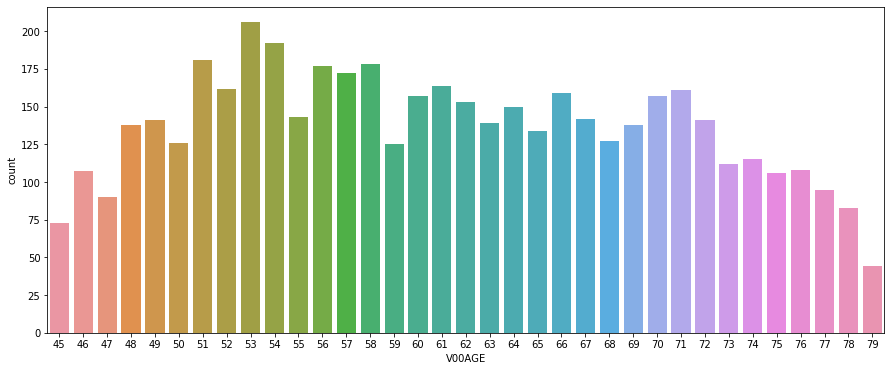

In [5]:
plt.figure(figsize=(15,6))
sns.countplot(x='V00AGE',data = df)
plt.show()

#### Now let's take a look at participant sex. There is a bias for female participants (58.5% are women):

In [6]:
x = df['P02SEX'].value_counts()
x

2: Female    2804
1: Male      1992
Name: P02SEX, dtype: int64

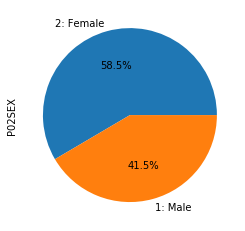

In [7]:
x.plot(kind = 'pie' , autopct='%.1f%%')

#### Let's check out participant race:

In [8]:
races = df['P02RACE'].value_counts().index
totals = df['P02RACE'].value_counts()
totals

1: White or Caucasian               3790
2: Black or African American         874
0: Other Non-white                    82
3: Asian                              45
.D: Don t Know/Unknown/Uncertain       3
.R: Refused                            2
Name: P02RACE, dtype: int64

In [9]:
x = 0
percents = []
for x in range(len(races)):
    percents = percents + [ round((totals[x]/sum(totals)) * 100,2)]
    

#### Very little hispanic representation:

In [10]:
hispanic = df['P02HISP'].value_counts().index
h_totals = df['P02HISP'].value_counts()
h_totals

0: No                               4734
1: Yes                                60
.R: Refused                            1
.D: Don t Know/Unknown/Uncertain       1
Name: P02HISP, dtype: int64

#### The race distribution could be more representative of the demographics of the United States.
#### The study needs more asian participation as well as hispanic:

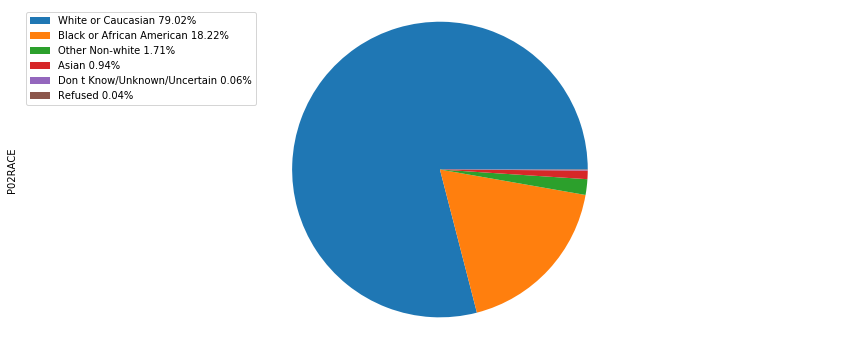

In [11]:
totals.plot(kind = 'pie' , figsize=(15, 6), labels = None)
labs = []
x = 0
for x in range(len(races)):
    race = races[x]
    labs = labs + [race[race.find(' ')+1:] + " " + str(round((totals[x]/sum(totals)) * 100,2)) + "%"]

plt.axis('equal') 
plt.legend(labels=labs, loc='upper left') 

 ##### This information matches with what is reported in the Enrollees_Stats document (within the General_ASCII folder)